In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/탄소중립(59,295건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '커뮤니티'))
    return df

community = load_all_data()

## 커뮤니티 Sheet

In [4]:
community.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3    17
dtype: int64

In [5]:
community.columns = community.iloc[0]
community.drop(0, inplace=True, axis=0)
community = community.dropna(axis=0, how='any')
community = community[~community['내용'].str.contains('http')]
community = community[community['내용'].str.contains('[가-힣]')]
community = community[community['내용'].str.len() < 1000]


print(community.shape)
community.head()

(612, 4)


,작성일,작성자,제목,내용
11,2022/06/24,slr클럽,중국의 탄소중립과 탄소 배출권,탄소중립은 유럽이 젤 앞에서 말하던 건데 그 기저에는 싼 러시아산 가스가 있었으나_...
12,2022/06/19,보배드림2,탄소중립 탄소세 원전 선동하는 일베알바들을 위해 정리,보시면 추천 부탁드립니다. 하도 알바들이 도배해대서 나름 정리해서 올려봅니다. _x...
13,2022/06/15,MLB파크,"안철수 의원 ""탄소 중립위해 제조업 등 5개 분야 신기술 개발 필요""",그는 “많은 사람이 전기를 만들 때 탄소가 나오지 않으면 탄소 중립이 실현된다고 잘...
14,2022/06/04,수만휘닷컴,탄소중립 화학,탄소중립에 대한 강의를 들어서 진로에 쓸 수가 있는데 탄소 중립 중에 탄소포집기술과...
22,2022/06/24,디젤매니아,[공유] 푸틴이 뒤흔든 유럽 '탄소 중립의 꿈',푸틴이 뒤흔든 유럽 '탄소 중립의 꿈' _x000D_\n러시아 천연가스 공급 줄이자...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_community = tfdif(community['내용'])

In [8]:
tfidf_community = tfidf_community.loc[:, tfidf_community.columns.str.contains('[가-힣]')]

In [9]:
tfidf_community

,07 오전,0이라는,1조,2018년에,2021년,2022년,2030년까지,2050 탄소중립,2050년,2050년까지,...,활용,활용한,활용한 부유식,활용해,황제주삼성중공업은,황제주삼성중공업은 해양플랜트,효율화,후보가,후쿠시마,훨씬
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import pickle

tfidf_community.to_pickle('tfidf_community.pkl')

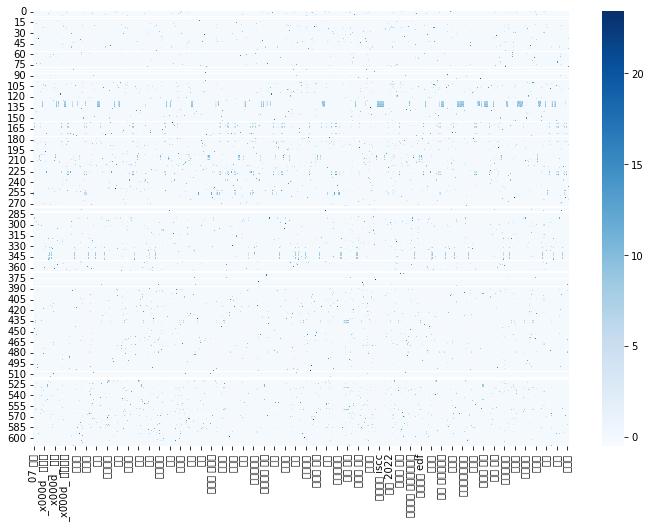

In [11]:
tfidf_community = (tfidf_community - tfidf_community.mean()) / tfidf_community.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_community, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly here as well

as we can see in the graph above